# 6章 アルゴリズムチェーンとパイプライン

In [1]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

cancer = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

scaler = MinMaxScaler().fit(x_train)

x_train_scaled = scaler.transform(x_train)

svm = SVC()
svm.fit(x_train_scaled, y_train)

x_test_scaled = scaler.transform(x_test)
print("Test score: {:.2f}".format(svm.score(x_test_scaled, y_test)))

Test score: 0.95


## 6.1 前処理を行う際のパラメータ選択

In [3]:
from sklearn.model_selection import GridSearchCV

param_grid = {"C": [0.001, 0.01, 0.1, 1, 10, 100], "gamma": [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
grid.fit(x_train_scaled, y_train)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Best set score: {:.2f}".format(grid.score(x_test_scaled, y_test)))
print("Best parameters: ", grid.best_params_)

Best cross-validation accuracy: 0.98
Best set score: 0.97
Best parameters:  {'C': 1, 'gamma': 1}


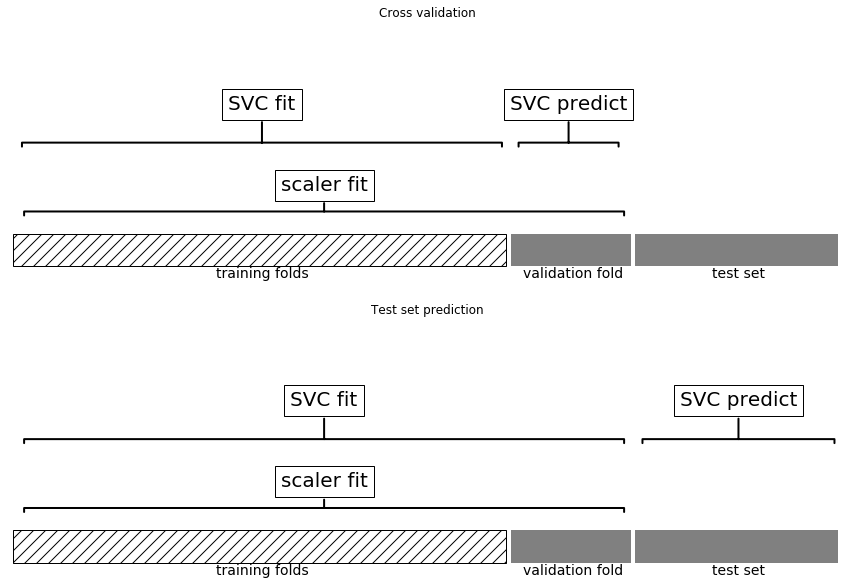

In [6]:
%matplotlib inline
import mglearn
mglearn.plots.plot_improper_processing()

## 6.2 パイプラインの構築

In [7]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("scaler", MinMaxScaler()),
    ("svm", SVC())
])

pipe.fit(x_train, y_train)
print("Test score: {:.2f}".format(pipe.score(x_test, y_test)))

Test score: 0.95


## 6.3 パイプラインを用いたグリッドサーチ

In [8]:
param_grid = {"svm__C": [0.001, 0.01, 0.1, 1, 10, 100], "svm__gamma": [0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(x_train, y_train)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(x_test, y_test)))
print("Best parameters:{}".format(grid.best_params_))

Best cross-validation accuracy: 0.98
Test set score: 0.97
Best parameters:{'svm__C': 1, 'svm__gamma': 1}


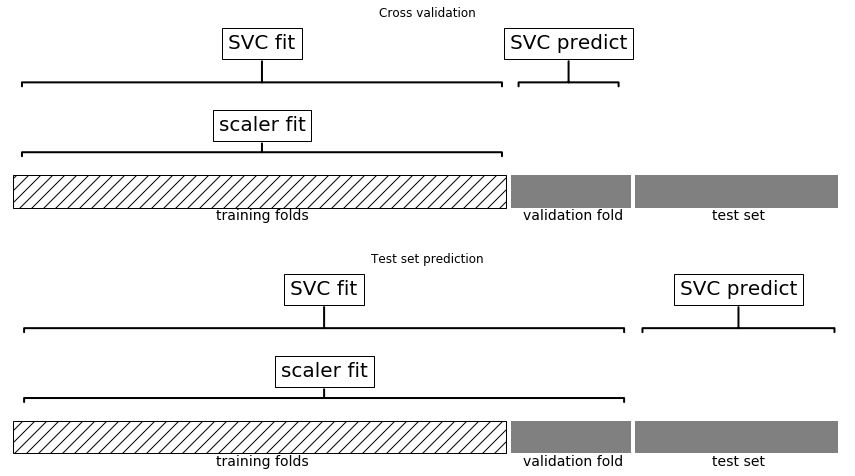

In [9]:
mglearn.plots.plot_proper_processing()

In [11]:
import numpy as np

rnd = np.random.RandomState(seed=0)
x = rnd.normal(size=(100, 10000))
y = rnd.normal(size=(100,))

from sklearn.feature_selection import SelectPercentile, f_regression

select = SelectPercentile(score_func=f_regression, percentile=5).fit(x, y)
x_selected = select.transform(x)
print("x_selected.shape: {}".format(x_selected.shape))

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
print("Cross-validation accuracy (cv only on ridge): {:.2f}".format(np.mean(cross_val_score(Ridge(), x_selected, y, cv=5))))

x_selected.shape: (100, 500)
Cross-validation accuracy (cv only on ridge): 0.91


In [12]:
pipe = Pipeline([
    ("select", SelectPercentile(score_func=f_regression, percentile=5)),
    ("ridge", Ridge())
])
print("Cross-validation accuracy (pipeline): {:.2f}".format(np.mean(cross_val_score(pipe, x, y, cv=5))))

Cross-validation accuracy (pipeline): -0.25
